## Assignment - Collaboration

### Li Ruixue

### Kaggle open call projects

#### Part 2. 
My project of interest is Dog Breed Identification (https://www.kaggle.com/c/dog-breed-identification)
The goal of the project is to train a deep neural network to identify the breed of a dog from an image of it.

The organizer provides a training dataset and test datasets, each containing a subset of dog images from ImageNet with unique IDs as filenames. The project also provides a table specifying the breeds of dogs in the train image set, by linking each image ID to a breed name. 

To make a submission, I'll need to train a neural network with the training images provided, and apply the trained neural network on the test dataset to produce a classifier that assigns the likehoods of breeds to each image in the test dataset. I'll need to submit a table mapping each image ID in the test dataset into a likelihood matrix with each breed. The outcome will be measured by how accurate the predictions from the neural network match the actual breeds of the dogs in the test dataset. 

The main challenge of this project is that the train data size is quite limited and therefore it's difficult to make the predictions accurate. Therefore, previously trained models and external datasets are allowed to be used as a supplement. 


#### Part 3.

I've chosen to explore the dataset of salaries by college, region, and academic major, available at: https://www.kaggle.com/wsj/college-salaries

Three datasets are provided: 
salaries by degree
salaries by college type (party, engineering, liberal arts, state)
salaries by region

For this task, I'll be exploring the salaries by college type dataset as I'm most interested in finding out something on this topic. I'd expect that students from engineering colleges will have highest earnings, but I'm not sure about the remaining three. 

I'll first load and have a preview of the data:

In [178]:
import pandas as pd
import numpy as np

In [179]:

sal_by_college_type = pd.read_csv("/Users/liruixue/Desktop/persp/collaboration/salaries-by-college-type.csv")

In [180]:
sal_by_college_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


I've noticed that the dataset provides us with school names, school types, starting and mid-career median salary, and mid-career 10th, 25th, 75th, and 90th percentile salaries. I'd like to compare the average starting and mid-career median salaries of different school types. To do so, I'll find the average starting salaries for each college type, and plot a bar chart. 

In [181]:
df = sal_by_college_type.loc[:, ['School Type', 'Starting Median Salary', 'Mid-Career Median Salary']]
df.head()

,School Type,Starting Median Salary,Mid-Career Median Salary
0,Engineering,"$72,200.00","$126,000.00"
1,Engineering,"$75,500.00","$123,000.00"
2,Engineering,"$71,800.00","$122,000.00"
3,Engineering,"$62,400.00","$114,000.00"
4,Engineering,"$62,200.00","$114,000.00"


In [182]:
df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('$', '')
df['Starting Median Salary'] = df['Starting Median Salary'].str.replace(',', '')
df['Starting Median Salary'] = df['Starting Median Salary'].str.replace('.', '')

df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('$', '')
df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace(',', '')
df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].str.replace('.', '')

df['Starting Median Salary'] = df['Starting Median Salary'].astype(str).astype(int)
df['Mid-Career Median Salary'] = df['Mid-Career Median Salary'].astype(str).astype(int)

df['Starting Median Salary'] /= 100
df['Mid-Career Median Salary'] /= 100

df.head()

,School Type,Starting Median Salary,Mid-Career Median Salary
0,Engineering,72200.0,126000.0
1,Engineering,75500.0,123000.0
2,Engineering,71800.0,122000.0
3,Engineering,62400.0,114000.0
4,Engineering,62200.0,114000.0


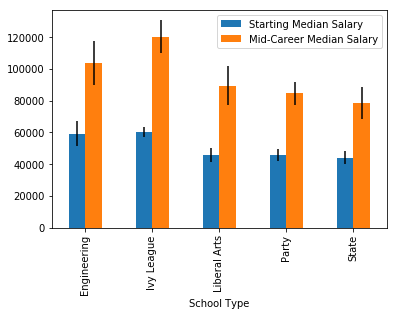

In [183]:
df_grouped = df.groupby('School Type')['Starting Median Salary', 'Mid-Career Median Salary']
mean = df_grouped.mean()
std_err = df_grouped.std()
fig, ax = plt.subplots()
mean.plot.bar(yerr=std_err, ax=ax)
plt.show()


From the plot, it's clear that Ivy League school graduates have higher starting and mid-career median salary, and their advantage is even bigger as they progress into mid-career. Meanwhile, students from engineering schools have the largest standard deviation, meaning that they have higher variance in earnings.

### Improving a journal article
####  Look through a recent issue of a journal in your field. Find a paper that you think could have been reformualted as a human computation project. How would you formulate the data collection as a human computation project? How might this improve the study?


The article I chose is *Anger Is More Influential than Joy: Sentiment Correlation in Weibo*, the full-text of which I have included in my submission. 

*Weibo* is a Twitter-like microblogging site in China, and it's tremendously popular in recent years. This journal article tried to find that whether there's a stronger sentiment correlation between a pair of users if they are more connected, i.e. whether users will have similar emotions if they interact more on the site. 

To study this effect, the researchers crawled 70 million tweets from Weibo, constructed an interaction network, and defined a metric to measure the strength of interaction between two users. They then labeled the sentiment of the tweets into four categories: anger, joy, disgust, and sadness, and calculated the correlations of sentiment between connected users. They found that anger has a surprisingly higher correlation than other emotions, indicating that users who interact with each other more are more likely to feel angry together. 

However, I think that the task of labeling the sentiment of the tweets in this research project could be improved by being formulated as a human computation project. 

Since the would like to avoid the intensive labor involved in creating training samples for more accurate machine learning algorithms of detecting text sentiment, they relied purely on emotions as a predictor for the sentiment of the tweets. More specifically, they labeled the sentiments of 95 most popular emotions, narrowed their dataset down to only those tweets with valid emotions, and only used those tweets for their analysis. The issues with this approach are obvious: 
1. The use of emotions is very flexible on social networking sites, and therefore the sentiment that those emotions express when they are viewed in isolation by the researchers could be very different from what they express when they are used in the actual text, especially when sarcasm is involved. A salient example would be that the continuous use of multiple smiley faces is very often associated with negative emotional messages like "I've given up", "I don't care", "This is ridiculous" in the Chinese internet world, which is far from what they originally represent, and therefore what they researchers would've labeled the data as - "joy". 

2. There were only 3.5 million out of 70 million tweets that contain valid emoticons, and intuitively, this is not likely to be a random sample since the profile of a typical heavy emoticon user would likely be different from a user who rarely uses emoticons. Therefore, by using emoticons as the only means of identifying sentiment, the sample is inevitably limited and biased. 

Introducing human computation component to the data collection process will greatly improve the accuracy of this study. Since tweets are very short, a native Chinese speaker would be able to identify and label its sentiment within a few seconds. Plus the fact that the number of internet users in China is huge and many of them are willing to work online at a very low rate, it would be possible to at least label a sufficiently large random sample from the tweets, if not all of them. Besides, humans are much better at detecting nuances in the language and are more likely to label the sentiments correctly. By increasing the accuracy of the data, the conclusion of this research will become much more convincing. In fact, I think that the researchers were also aware that this would be a better approach, but they might have faced some practical constraints and were unable to adopt it.



### Amazon Mechanical Turk 

I completed an hour of work on another site microworkers.com and attached the screenshots: